<a href="https://colab.research.google.com/github/ridhodori/machine-learning/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ridho Noebelino S / 1301194245

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import copy
from scipy import stats
from sklearn.metrics import silhouette_score

### Dataset kendaraan_train

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ridhodori/machine-learning/main/kendaraan_train.csv')
data

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


##**Data explored**

In [ ]:
data.shape

(285831, 12)

In [ ]:
data.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
data.drop("id", axis=1, inplace=True)
data.drop("Jenis_Kelamin", axis=1, inplace=True)
data.drop("Kendaraan_Rusak", axis=1, inplace=True)
data.drop("Umur_Kendaraan", axis=1, inplace=True)
data.drop("Tertarik", axis=1, inplace=True)
from sklearn.cluster import KMeans
data.drop("SIM", axis=1, inplace=True)

### check null number

In [ ]:
data.isnull().sum()

Umur                 14214
Kode_Daerah          14306
Sudah_Asuransi       14229
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

### drop the null data NULL

In [ ]:
data = data.dropna()
data.isnull().sum()

Umur                 0
Kode_Daerah          0
Sudah_Asuransi       0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [ ]:
data.duplicated().sum()

320

In [ ]:
data.drop_duplicates()

,Umur,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,1.0,28029.0,152.0,97.0
1,48.0,39.0,0.0,25800.0,29.0,158.0
2,21.0,46.0,1.0,32733.0,160.0,119.0
3,58.0,48.0,0.0,2630.0,124.0,63.0
4,50.0,35.0,0.0,34857.0,88.0,194.0
...,...,...,...,...,...,...
285826,23.0,4.0,1.0,25988.0,152.0,217.0
285827,21.0,46.0,1.0,44686.0,152.0,50.0
285828,23.0,50.0,1.0,49751.0,152.0,226.0
285829,68.0,7.0,1.0,30503.0,124.0,270.0


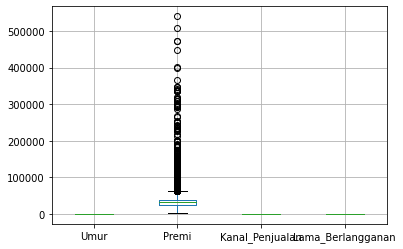

In [ ]:
data[['Umur', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan']].boxplot()

In [ ]:
z_score = np.abs(stats.zscore(data[['Umur', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan']]))
threshold = 3

data = data[(z_score < 3).all(axis = 1)]
data

,Umur,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,1.0,28029.0,152.0,97.0
1,48.0,39.0,0.0,25800.0,29.0,158.0
2,21.0,46.0,1.0,32733.0,160.0,119.0
3,58.0,48.0,0.0,2630.0,124.0,63.0
4,50.0,35.0,0.0,34857.0,88.0,194.0
...,...,...,...,...,...,...
285826,23.0,4.0,1.0,25988.0,152.0,217.0
285827,21.0,46.0,1.0,44686.0,152.0,50.0
285828,23.0,50.0,1.0,49751.0,152.0,226.0
285829,68.0,7.0,1.0,30503.0,124.0,270.0


### show the correlation

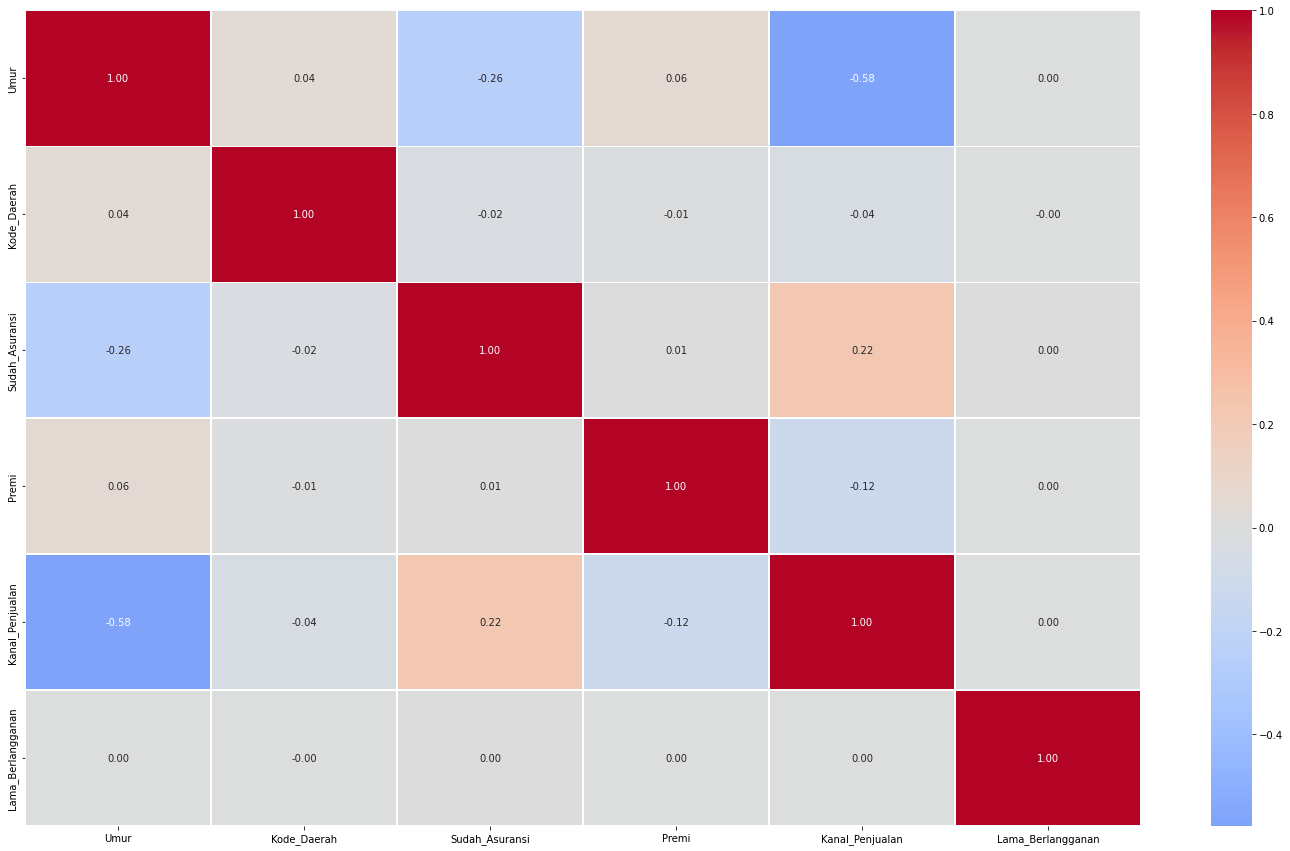

In [ ]:
corr_mat = data.corr()
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(data.corr(), annot=True, ax=ax,
            fmt='.2f', cmap='coolwarm', linewidths=.5,
             center= 0)
plt.show()

In [ ]:
Scale = MinMaxScaler()
result = Scale.fit_transform(data)
datanew.loc[:, [column for column in data.columns]] = result
datanew

,Umur,Kanal_Penjualan,Premi,Lama_Berlangganan,Kode_Daerah,Sudah_Asuransi
0,0.153846,0.932099,0.320869,0.301038,0.634615,1.0
1,0.430769,0.172840,0.292709,0.512111,0.750000,0.0
2,0.015385,0.981481,0.380295,0.377163,0.884615,1.0
3,0.584615,0.759259,0.000000,0.183391,0.923077,0.0
4,0.461538,0.537037,0.407128,0.636678,0.673077,0.0
...,...,...,...,...,...,...
285826,0.046154,0.932099,0.295084,0.716263,0.076923,1.0
285827,0.015385,0.932099,0.531299,0.138408,0.884615,1.0
285828,0.046154,0.932099,0.595285,0.747405,0.961538,1.0
285829,0.738462,0.759259,0.352123,0.899654,0.134615,1.0


**Box Plot**

## **KMeans**

In [ ]:
  def euclidean(x1,x2) : 
    return np.sqrt(np.sum((x1-x2)**2))

  class KMEANS : 
      def __init__(k, kmeans , max_iteration): 
          k.kmeans = kmeans
          k.max_iteration = max_iteration
          k.Centroid = []
          k.cluster = [[] for i in range(k.kmeans)]
      def centroid_near(k, row) : 
          Total_distance_Centroid = [euclidean(row,centroid) for centroid in k.Centroid]
          return np.argmin(Total_distance_Centroid)
    
      def new_centroid(k) : 
          Centroid = np.zeros((k.kmeans, k.column))

          for indexCluster, cluster in enumerate(k.cluster) : 
              centroidnew = np.mean(k.A[cluster], axis=0)
              Centroid[indexCluster] = centroidnew

          return Centroid
      
      def make_label(k) : 
          label = np.empty(k.line)
          for indexCluster, cluster in enumerate(k.cluster):
              for row in cluster:
                  label[row] = indexCluster
          return label
          
      def clusster(k, A) : 
          k.A = A
          k.line , k.column = A.shape

          indexCentroid = np.random.choice(k.line, k.kmeans, replace=False)
          for index in indexCentroid : 
              k.Centroid.append(k.A[index])
          for i in range(k.max_iteration) : 
              cluster = [[] for i in range(k.kmeans)]
              for idx, row in enumerate(k.A) : 
                  index_close_centroid = k.centroid_near(row)
                  cluster[index_close_centroid].append(idx)   
              k.cluster = cluster
              old_centroid = k.Centroid
              k.Centroid = k.new_centroid()
              change = False
              for i, centroidold in enumerate(old_centroid) : 
                  distance = euclidean(centroidold, k.Centroid[i])
                  if (distance != 0) :
                      change = True
                  else:
                      change = False
              if (change == False) : 
                  break
          label = k.make_label()
          return label

    

## **Eksperimen Dataset**

In [ ]:
data1 = data.loc[:, ("Umur", "Kanal_Penjualan")]
data1new = datanew.loc[:, ("Umur", "Kanal_Penjualan")]

**Scatter plot**

with scalling

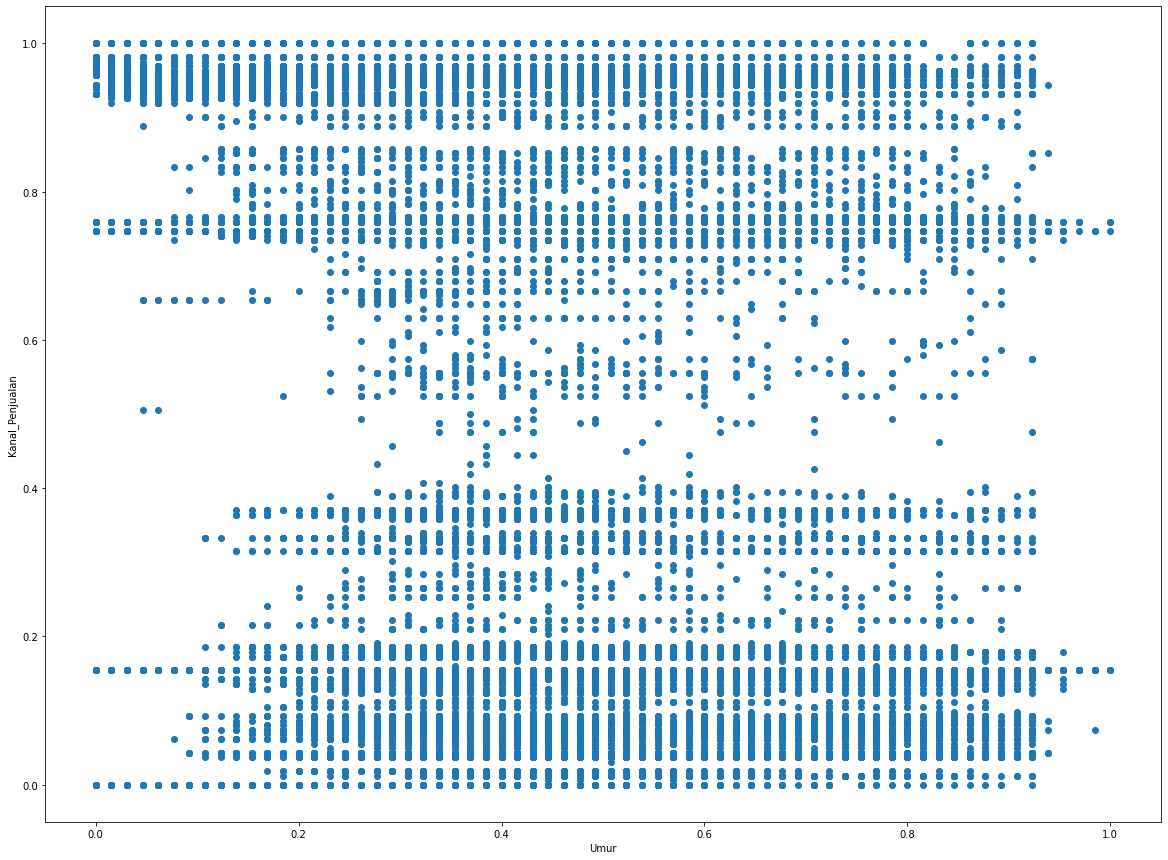

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
ax.scatter(data1new.iloc[:,0] , data1new.iloc[:,1] )
ax.set_xlabel(data1new.columns[0])
ax.set_ylabel(data1new.columns[1])

plt.show()

without scalling

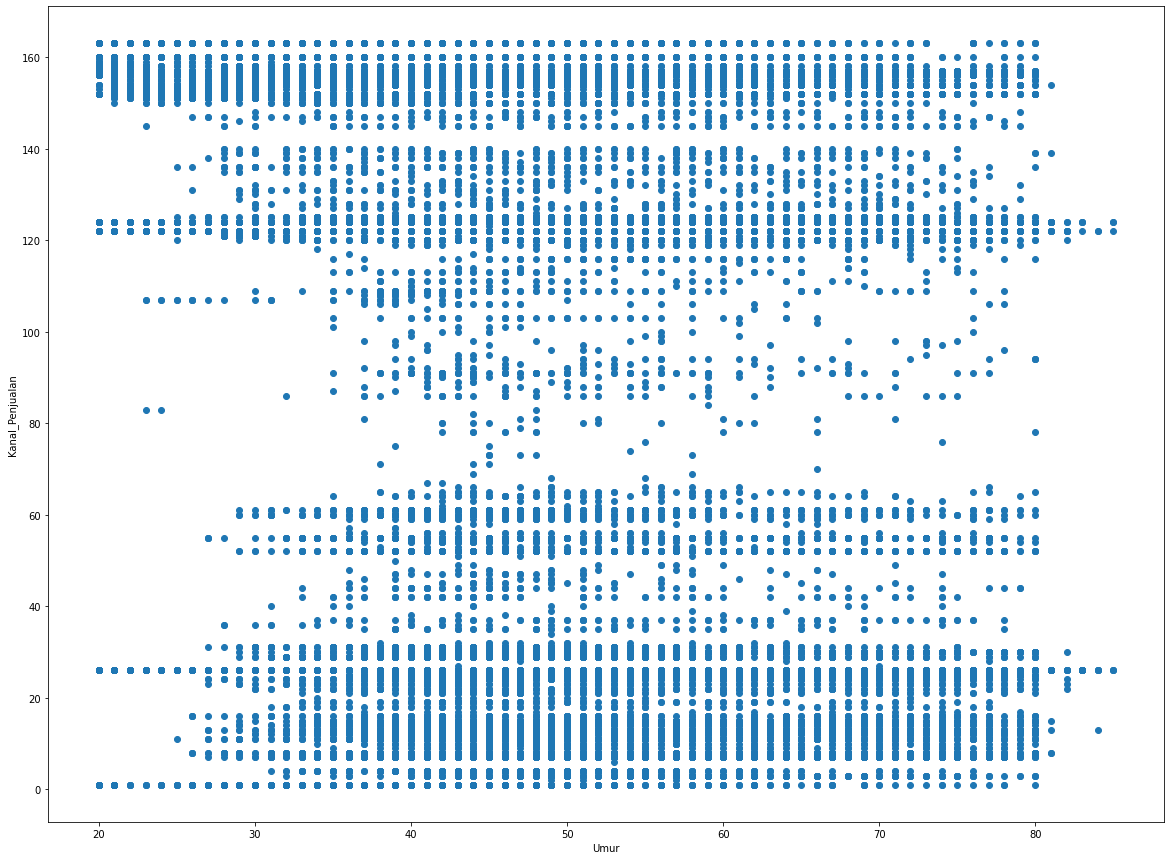

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
ax.scatter(data1.iloc[:,0] , data1.iloc[:,1] )
ax.set_xlabel(data1.columns[0])
ax.set_ylabel(data1.columns[1])

plt.show()

**Elbow Method**

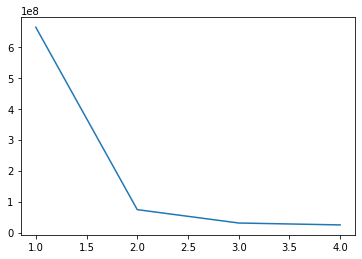

In [ ]:
range_kmeans = range(1,5)
Try_try1 = []
for i in range_kmeans : 
    kmeans_try1 = KMeans(n_clusters=i)
    kmeans_try1.fit(K1)
    Try_try1.append(kmeans_try1.inertia_)
plt.figure()
plt.plot(range_kmeans, Try_try1)

**Proses Clustering**

with scaling 

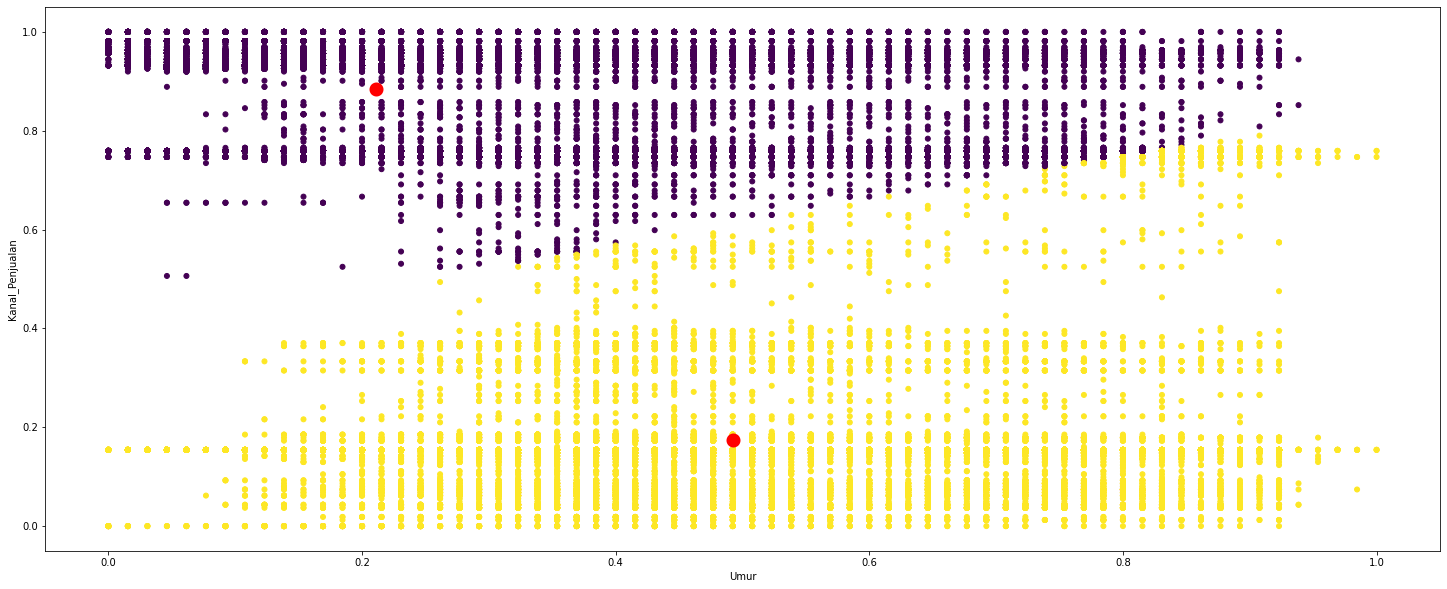

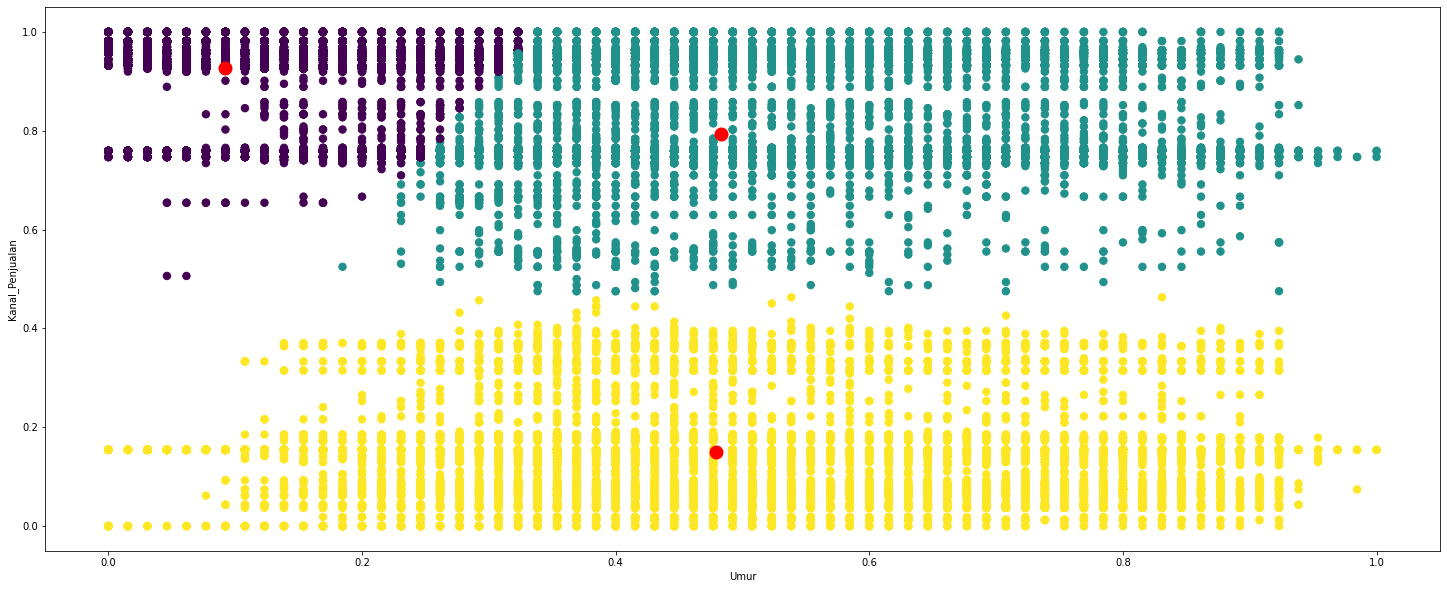

In [ ]:
K1_scaling = data1new.to_numpy()
K1_2_scaling = data1new.to_numpy()
Try1_1 = KMEANS(kmeans = 2, max_iteration=5)
y1_scaling = Try1_1.clusster(K1_scaling)

Try1_2 = KMEANS(kmeans = 3, max_iteration=5)
y1_2_scaling = Try1_2.clusster(K1_2_scaling)

plt.figure(figsize=(25,10))
plt.scatter(K1_scaling[:, 0], K1_scaling[:, 1], c=y1_scaling, s=25)

centroid = Try1_1.Centroid
plt.xlabel(data1new.columns[0])
plt.ylabel(data1new.columns[1])
plt.scatter(centroid[:, 0], centroid[:, 1], c= 'red', marker = 'o', linewidths = 8)
plt.show()
plt.figure(figsize=(25,10))
plt.scatter(K1_2_scaling[:, 0], K1_2_scaling[:, 1], c=y1_2_scaling, s=55)
centroid = Try1_2.Centroid
plt.xlabel(data1new.columns[0])
plt.ylabel(data1new.columns[1])
plt.scatter(centroid[:, 0], centroid[:, 1], c= 'red', marker = 'o', linewidths = 8)
plt.show()

without scalling

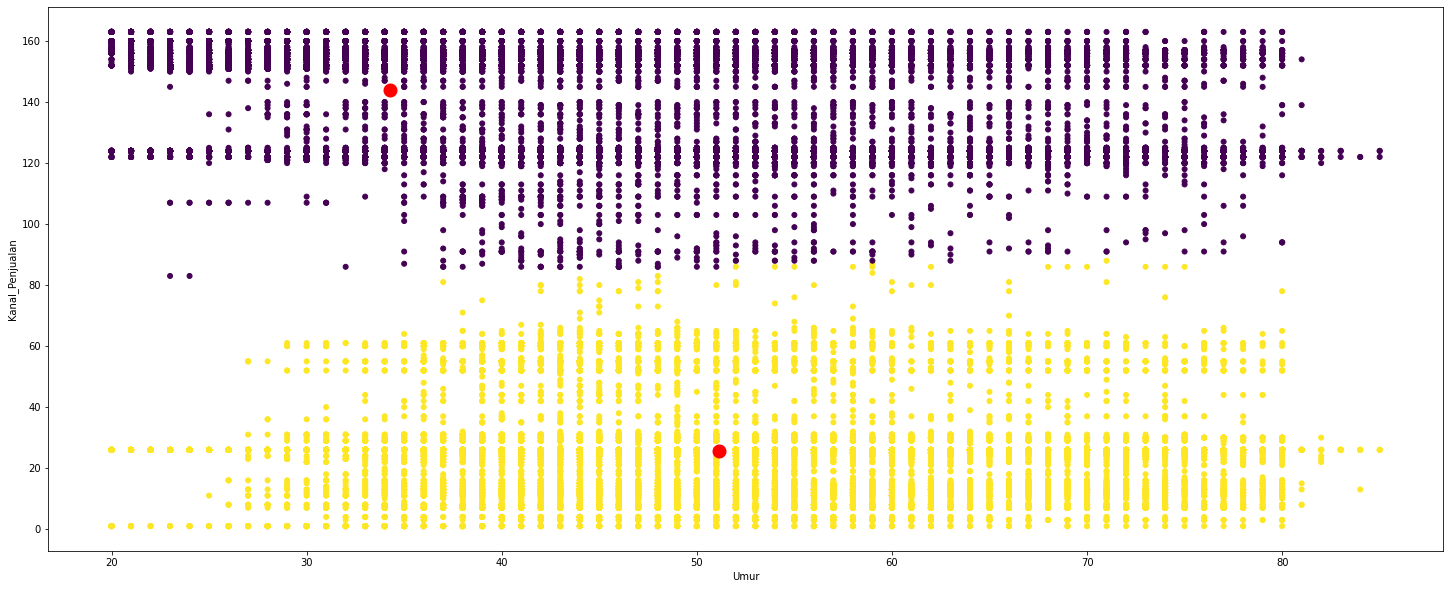

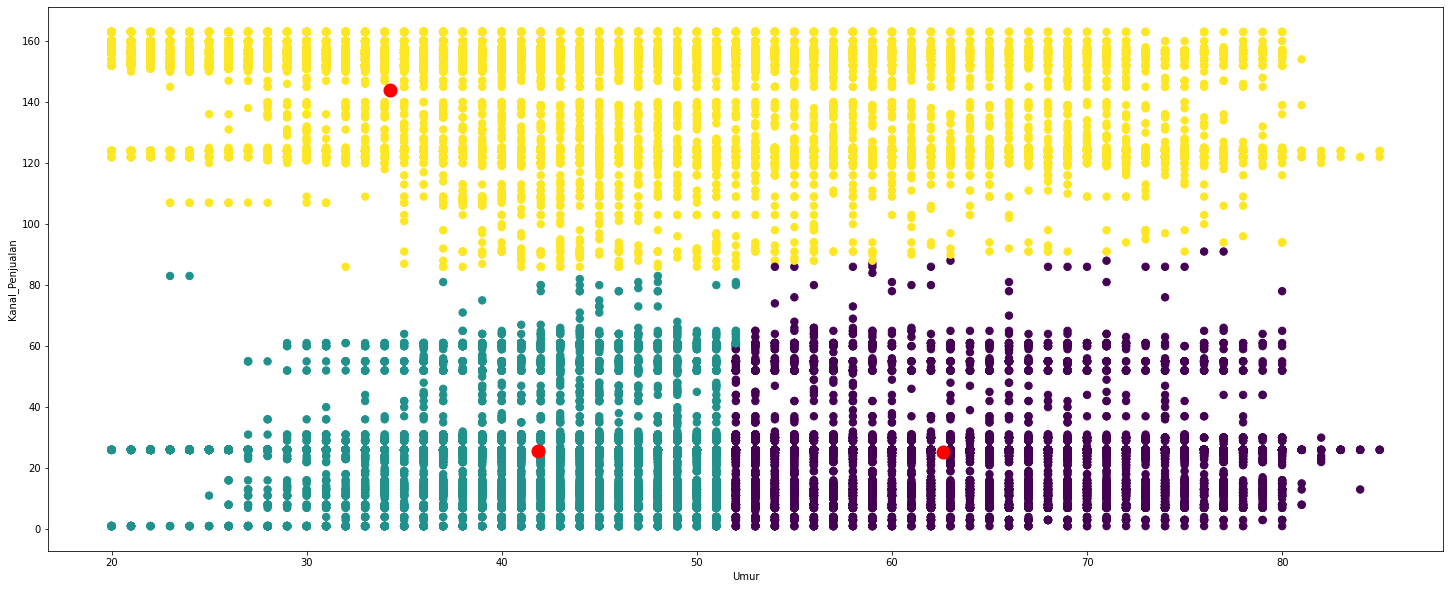

In [ ]:
K1 = data1.to_numpy()
K1_2 = data1.to_numpy()
Try1_1 = KMEANS(kmeans = 2, max_iteration=5)
y1 = Try1_1.clusster(K1)

Try1_2 = KMEANS(kmeans = 3, max_iteration=5)
y1_2 = Try1_2.clusster(K1_2)

plt.figure(figsize=(25,10))
plt.scatter(K1[:, 0], K1[:, 1], c=y1, s=25)

centroid = Try1_1.Centroid
plt.xlabel(data1.columns[0])
plt.ylabel(data1.columns[1])
plt.scatter(centroid[:, 0], centroid[:, 1], c= 'red', marker = 'o', linewidths = 8)
plt.show()
plt.figure(figsize=(25,10))
plt.scatter(K1_2[:, 0], K1_2[:, 1], c=y1_2, s=55)
centroid = Try1_2.Centroid
plt.xlabel(data1.columns[0])
plt.ylabel(data1.columns[1])
plt.scatter(centroid[:, 0], centroid[:, 1], c= 'red', marker = 'o', linewidths = 8)
plt.show()

with scaling

In [ ]:
silhouette1_scalling = silhouette_score(K1_scaling, y1_scaling)
silhouette1_2_scalling = silhouette_score(K1_2_scaling, y1_2_scaling)
print("Result from the silhouette score with K = 2 is  : " + str(silhouette1_scalling))
print(" ")
print("Result from the silhouette score with K = 3  is  : " + str(silhouette1_2_scalling))

Result from the silhouette score with K = 2 is  : 0.6778244099176395
 
Result from the silhouette score with K = 3  is  : 0.6580823894730182


without scaling

In [ ]:
silhouette1 = silhouette_score(K1, y1)
silhouette1_2 = silhouette_score(K1_2, y1_2)
print("Result from the silhouette score with K = 2 is  : " + str(silhouette1))
print(" ")
print("Result from the silhouette score with K = 3  is  : " + str(silhouette1_2))

Result from the silhouette score with K = 2 is  : 0.8162854820593789
 
Result from the silhouette score with K = 3  is  : 0.7052969865258149


### Eksperimen 2 

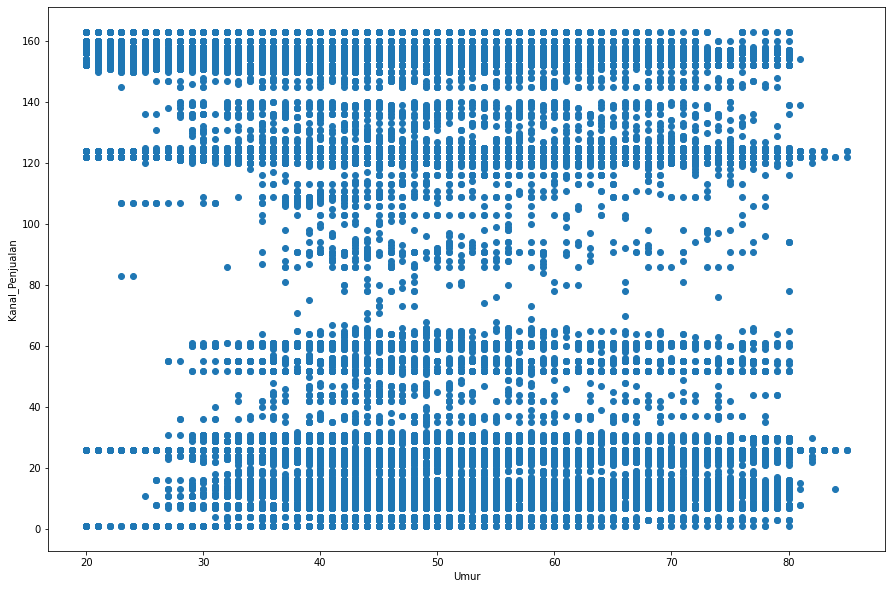

In [ ]:
data2 = data.loc[:, ("Premi", "Umur")]
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(data1.iloc[:,0] , data1.iloc[:,1] )
ax.set_xlabel(data1.columns[0])
ax.set_ylabel(data1.columns[1])

plt.show()

**Scatter plot**

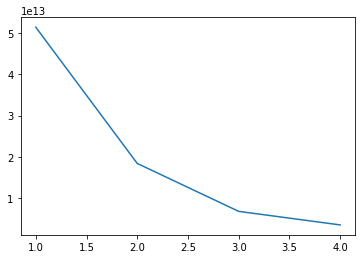

In [ ]:
range_kmeans = range(1,5)
Try_try2 = []
for i in range_kmeans : 
    kmeans_try2 = KMeans(n_clusters=i)
    kmeans_try2.fit(K2)
    Try_try2.append(kmeans_try2.inertia_)
plt.figure()
plt.plot(range_kmeans, Try_try2)

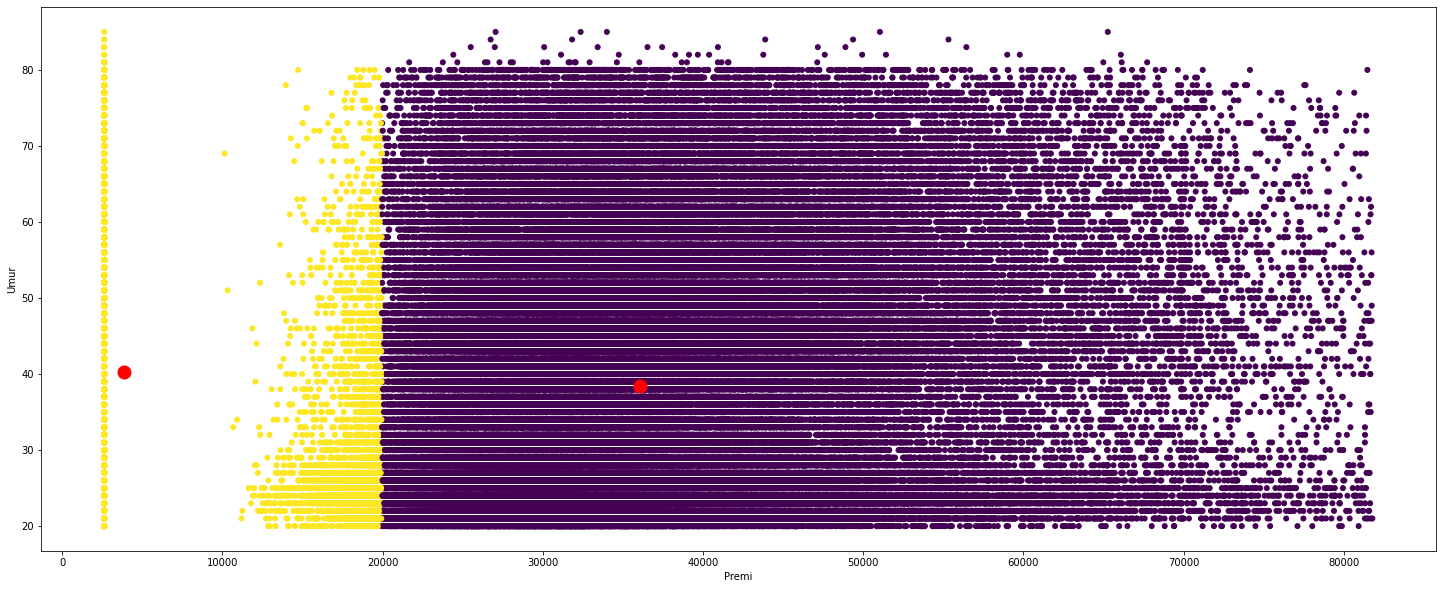

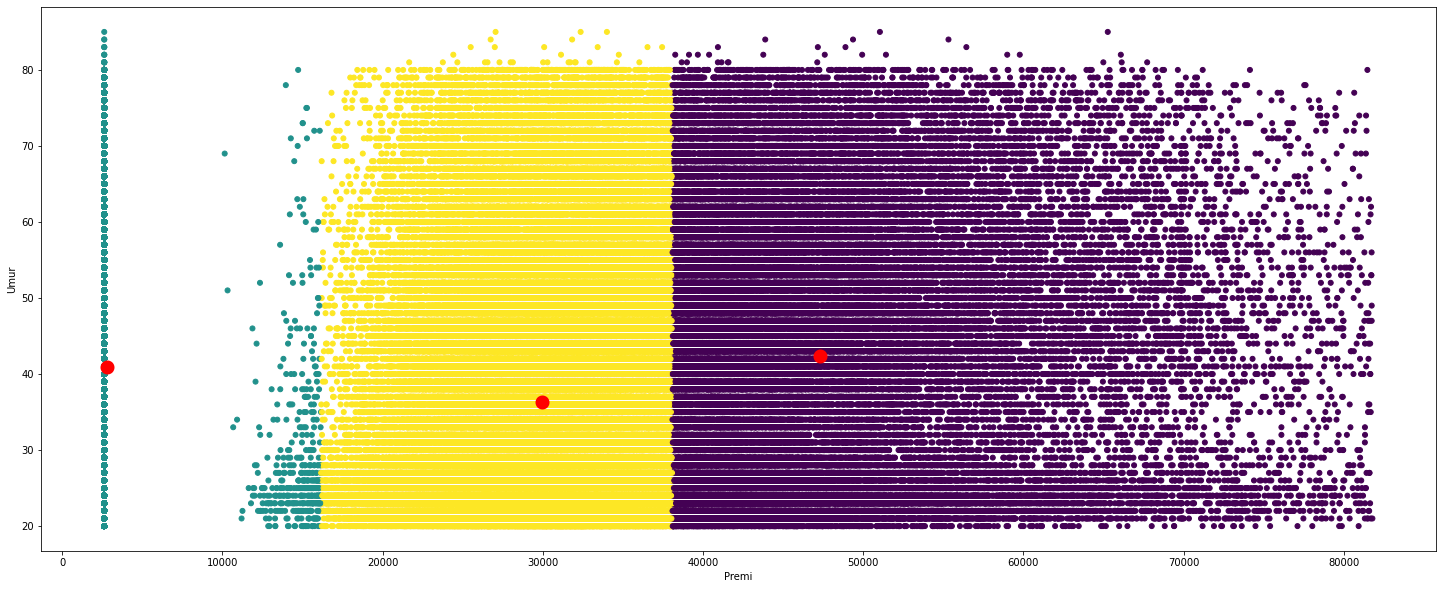

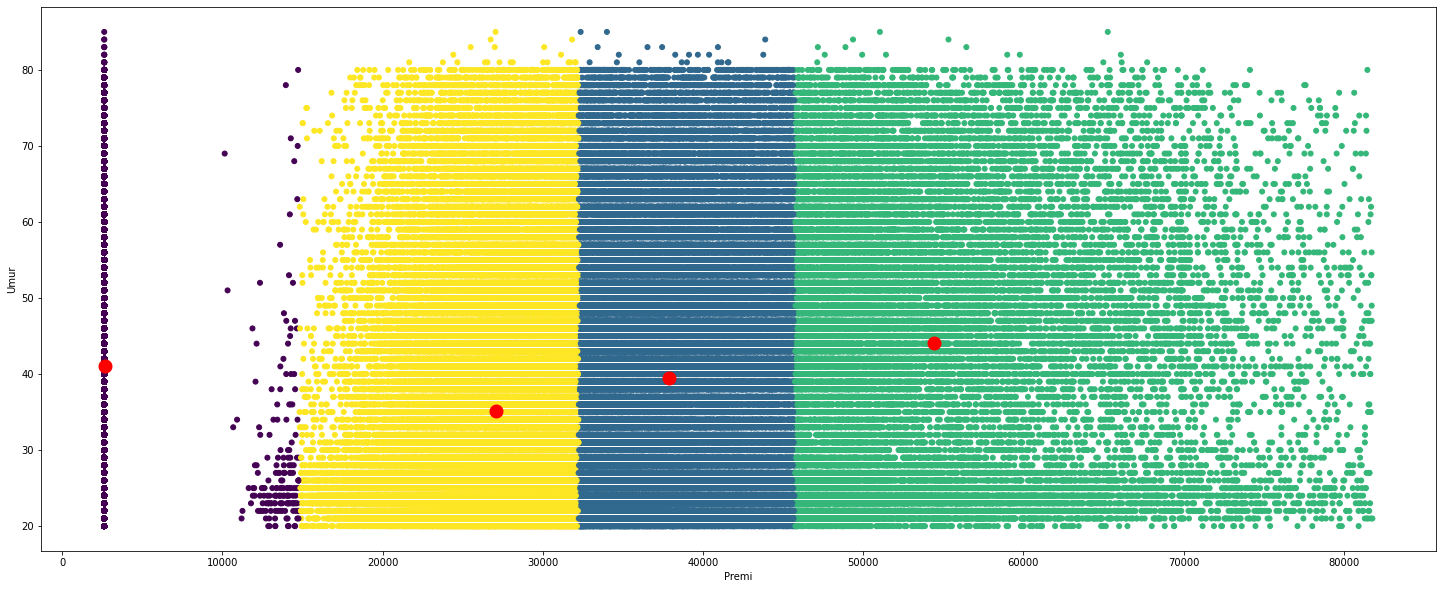

In [ ]:
K2 = data2.to_numpy()
K2_2 = data2.to_numpy()
K2_3 = data2.to_numpy()
Try2_1 = KMEANS(kmeans = 2, max_iteration=5)
y2 = Try2_1.clusster(K2)

Try2_2 = KMEANS(kmeans = 3, max_iteration=5)
y2_2 = Try2_2.clusster(K2_2)

Try2_3 = KMEANS(kmeans = 4, max_iteration=5)
y2_3 = Try2_3.clusster(K2_3)

plt.figure(figsize=(25,10))
plt.scatter(K2[:, 0], K2[:, 1], c=y2, s=25)

centroid = Try2_1.Centroid
plt.xlabel(data2.columns[0])
plt.ylabel(data2.columns[1])
plt.scatter(centroid[:, 0], centroid[:, 1], c= 'red', marker = 'o', linewidths = 8)
plt.show()
plt.figure(figsize=(25,10))
plt.scatter(K2_2[:, 0], K2_2[:, 1], c=y2_2, s=25)
centroid = Try2_2.Centroid
plt.xlabel(data2.columns[0])
plt.ylabel(data2.columns[1])
plt.scatter(centroid[:, 0], centroid[:, 1], c= 'red', marker = 'o', linewidths = 8)
plt.show()
plt.figure(figsize=(25,10))
plt.scatter(K2_3[:, 0], K2_3[:, 1], c=y2_3, s=25)
centroid = Try2_3.Centroid
plt.xlabel(data2.columns[0])
plt.ylabel(data2.columns[1])
plt.scatter(centroid[:, 0], centroid[:, 1], c= 'red', marker = 'o', linewidths = 8)
plt.show()